# Portfolio Project: Life Expectancy 

## Introduction

This project aims to investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?
+ Has GDP increased over time in the six nations?
+ Has life expectancy increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?




**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

To analyse the data, the following Python modules are required:

In [2]:
import csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Load the Data

In [3]:
#load the data
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The data has 96 rows and 4 columns.

## Explore the Data 

The six nations represented in the data are Chile, China, Germany, Mexico, United States of America (USA) and Zimbabwe.

In [5]:
#display the different countries in the dataset
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The years represented in the data are from 2000 to 2015 inclusive.

In [6]:
#display the years represented in the dataset.
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Cleaning Column Names

Given that all but one of the column names are one word, the column 'Life Expectancy at birth (years)' will be replaced by LEAB. 

In [7]:
#shorten column name to match the rest
data.rename(columns = {'Life expectancy at birth (years)': 'LEAB'}, inplace = True)
data.head()

,Country,Year,LEAB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## 1. Exploratory Plots

The following plots will explore the data. 

The plot below shows the distribution of GDP. As shown in the histogram below, the distribution is right-skewed with most values on the left-hand side.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


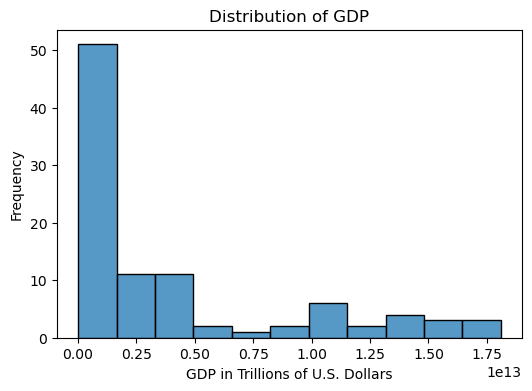

In [26]:
plt.figure(figsize=(6, 4))
plt.title('Distribution of GDP')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.ylabel('Frequency')
sns.histplot(data.GDP, kde=False)
plt.show()

The plot below shows the distribution of the life expectancy at birth. In contrast to GDP, it is left-skewed, with most values on the right-hand side.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


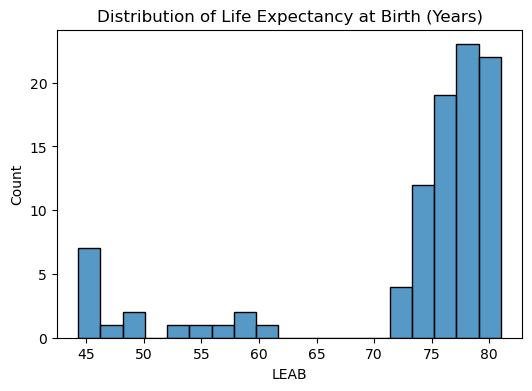

In [86]:
plt.figure(figsize = (6,4))
plt.title('Distribution of Life Expectancy at Birth (Years)')
plt.ylabel('')
sns.histplot(data.LEAB)
plt.show()

## 2. Average LEAB and GDP by country  

In [64]:
data_means = data.drop('Year', axis=1).groupby('Country').mean().reset_index()

In [65]:
data_means

,Country,LEAB,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


The following plot shows average life expectancy at birth by country. It appears that all countries except Zimbabwe have similar values, with Zimbabwe's average life expectancy being around 50 years. This explains the left skew in the above histogram.

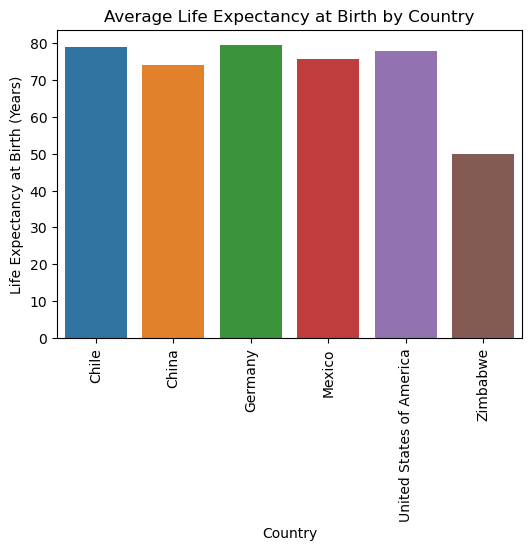

In [85]:
plt.figure(figsize = (6, 4))
plt.title('Average Life Expectancy at Birth by Country')
sns.barplot(data_means, x = 'Country', y = 'LEAB')
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.xticks(rotation = 90)
plt.show()

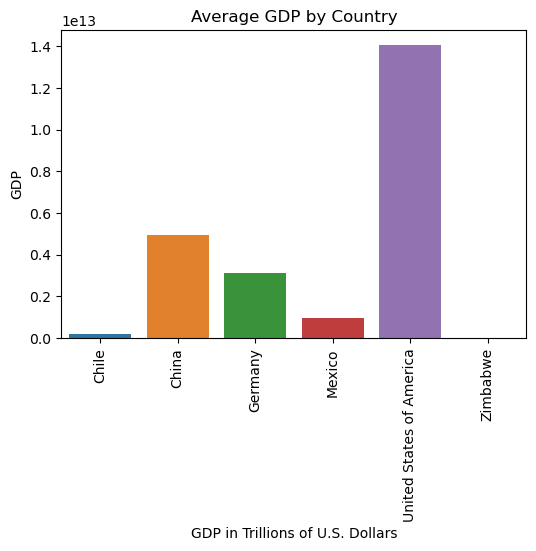

In [88]:
plt.figure(figsize = (6,4))
plt.title('Average GDP by Country')
sns.barplot(data_means, x = 'Country', y = 'GDP')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.xticks(rotation = 90)
plt.show()

The plot above shows average GDP by country. It shows that USA has a much higher GDP compared to the other countries. Zimbabwe's GDP is not visible on this plot and Chile's GDP is just about visible.

## Violin Plots

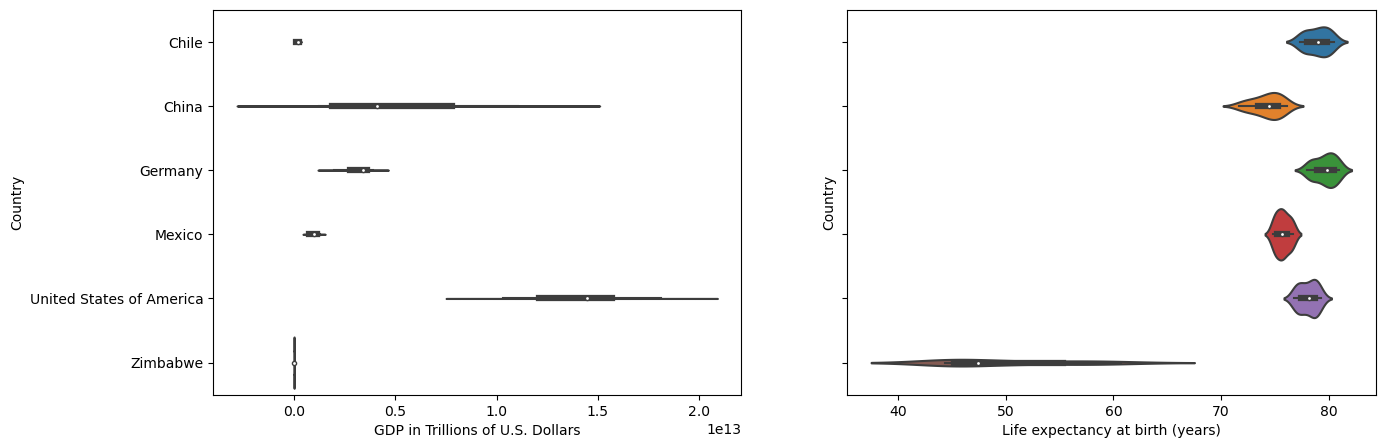

In [29]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=data.GDP, y=data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=data.LEAB, y=data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

Violin plots are able to show the shape of a distribution, in comparison to box plots.

In the GDP plot, on the left, China and USA have a relatively wide range, whereas Chile, Mexico and Zimbabwe have shorter ranges.

In the LEAB plot, all of the countries have shorter ranges, except for Zimbabwe which has a range spanning from below 40 years to the high 60s.

## Swarm Plots 

Swarm plots can be used to complement violin plots. They show dot density around the values in addition to distribution through shape and area.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

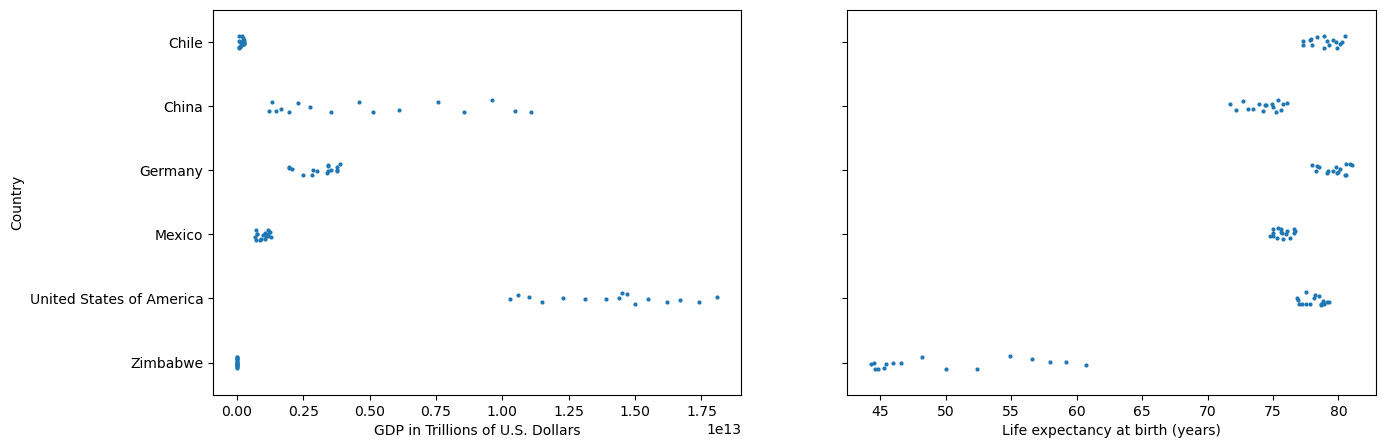

In [50]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.stripplot(ax=axes[0], x=data.GDP, y=data.Country, size = 3)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.stripplot(ax=axes[1], x=data.LEAB, y=data.Country, size = 3)
axes[1].set_xlabel("Life expectancy at birth (years)");

In the GDP plot, Chile and Zimbabwe have a vertical line of dots which shows the number of data points that fall around their values.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

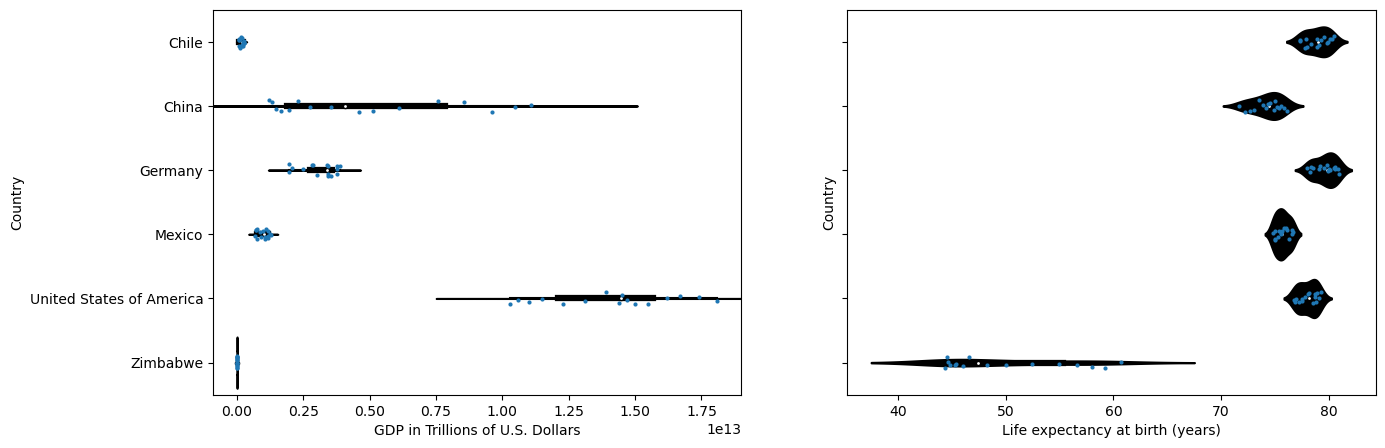

In [54]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=data.GDP, y=data.Country, color = 'black')
axes[0] = sns.stripplot(ax=axes[0], x=data.GDP, y=data.Country, size = 3)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=data.LEAB, y=data.Country, color = 'black')
axes[1] = sns.stripplot(ax=axes[1], x=data.LEAB, y=data.Country, size = 3)
axes[1].set_xlabel("Life expectancy at birth (years)");

The swarm plot has been overlayed on top of the violin plot.

## 3. Line Charts - GDP Change Over Time

The following line charts will show how life expectancy and GDP have changed over time in the six nations. 

The countries are separated by colours and it can be seen that the USA and China have had significant increases in their GDP between 2000 and 2015. China saw an increase from below a quarter of one trillion US dollars to 1 trillion. The other countries in this dataset did not see similar changes in this way.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


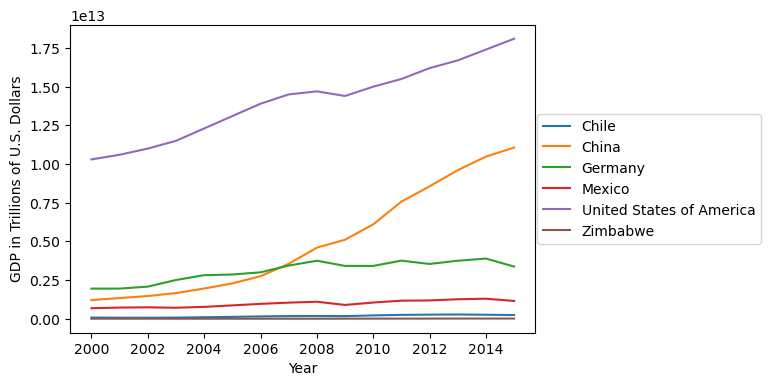

In [59]:
plt.figure(figsize=(6,4))
sns.lineplot(x = data.Year, y = data.GDP, hue = data.Country)
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.legend(loc = 7, bbox_to_anchor = (1.5,0.5))
plt.show()

Below shows the change in life expectancy over time by country. With each country having its own y-axis and scale, it is easier to compare the shape of their GDP over the years. It is now clearer to see that all countries have seen increases in comparison to the plot above. Most of the countries experienced a dip in GDP between 2005 and 2010 which could be investigated further but is most likely due to the Global Financial Crisis in 2008. All countries except China were significantly affected by this.

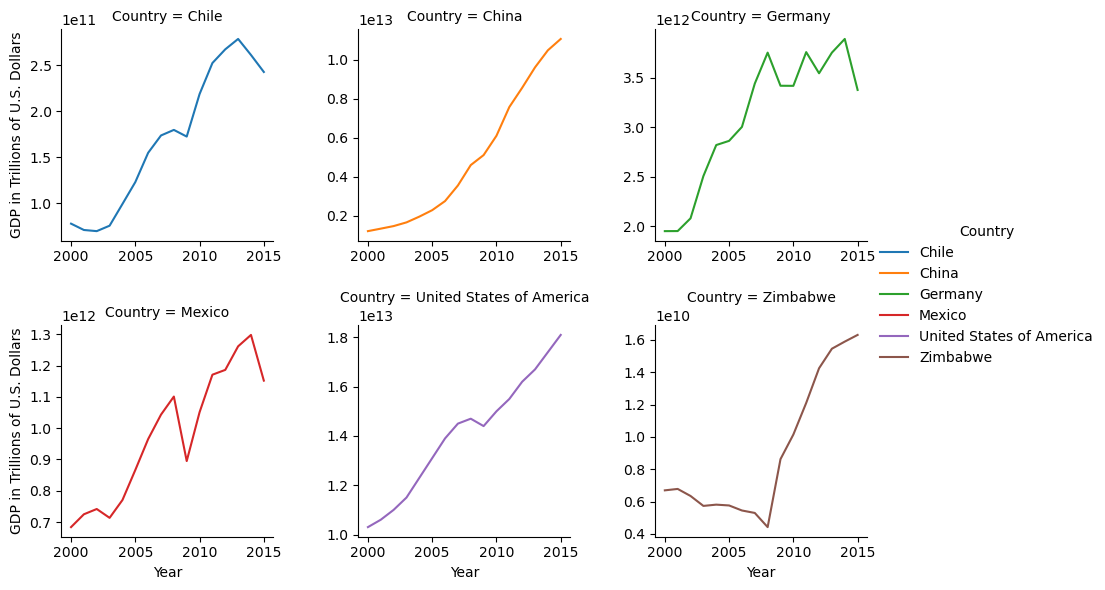

In [22]:
graph_GDP = sns.FacetGrid(data, col = 'Country', col_wrap = 3, 
                          hue = 'Country', sharey = False, sharex = False)
graph_GDP = (graph_GDP.map(plt.plot,"Year","GDP")
             .add_legend()
             .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)

## 4. Line Charts - Life Expectancy Changes Over Time

The plot below shows that all countries have had an increase in life expectancy between 2000 and 2015, with Zimbabwe showing the most significant increase after a dip in 2004.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


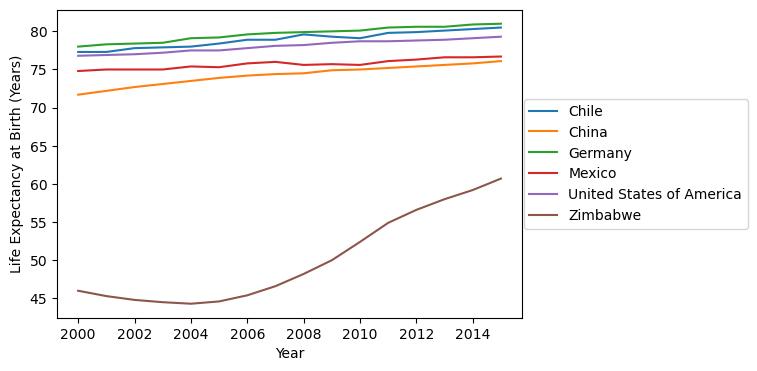

In [186]:
plt.figure(figsize=(6,4))
sns.lineplot(x = data.Year, y = data.LEAB, hue = data.Country)
plt.ylabel('Life Expectancy at Birth (Years)')
plt.legend(loc = 7, bbox_to_anchor = (1.5,0.5))
plt.show()

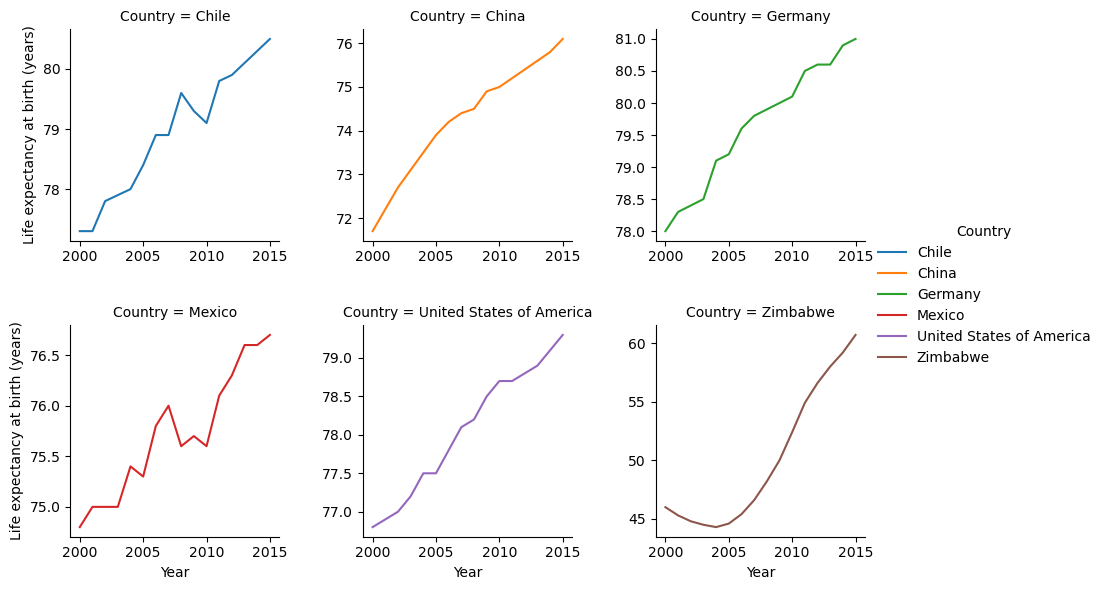

In [185]:
graph_LEAB = sns.FacetGrid(data, col = 'Country', col_wrap = 3, 
                           hue = 'Country', sharey = False, sharex = False)
graph_LEAB = (graph_LEAB.map(plt.plot,"Year","LEAB") 
              .add_legend() 
              .set_axis_labels("Year","Life expectancy at birth (years)"))

plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)

The plot above breaks out life expectancy by country. It shows that Chile and Mexico had dips in their life expectancy between 2005 and 2010, which was not apparent in the plot with the shared y-axis where these nuances were lost. The seemingly linear changes are actually not as smooth for some countries.

## 5. Scatter Plots - LEAB vs. GDP

The scatter plots below will explore the relationship between life expectancy at birth and GDP.

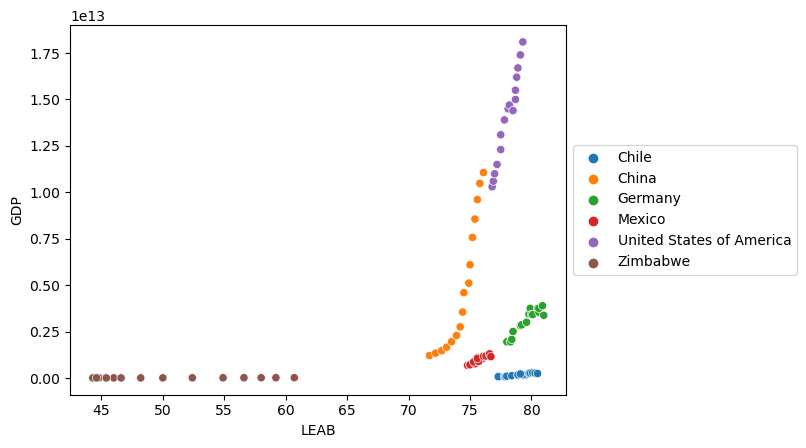

In [61]:
sns.scatterplot(x=data.LEAB, y=data.GDP, hue=data.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

In the plot above, as the life expectancy is increasing, the GDP in Zimbabwe is not changing, whereas it is increasing in the other countries. The USA and China seem to experience a similar rate of change in their relationships between life expectancy and GDP.

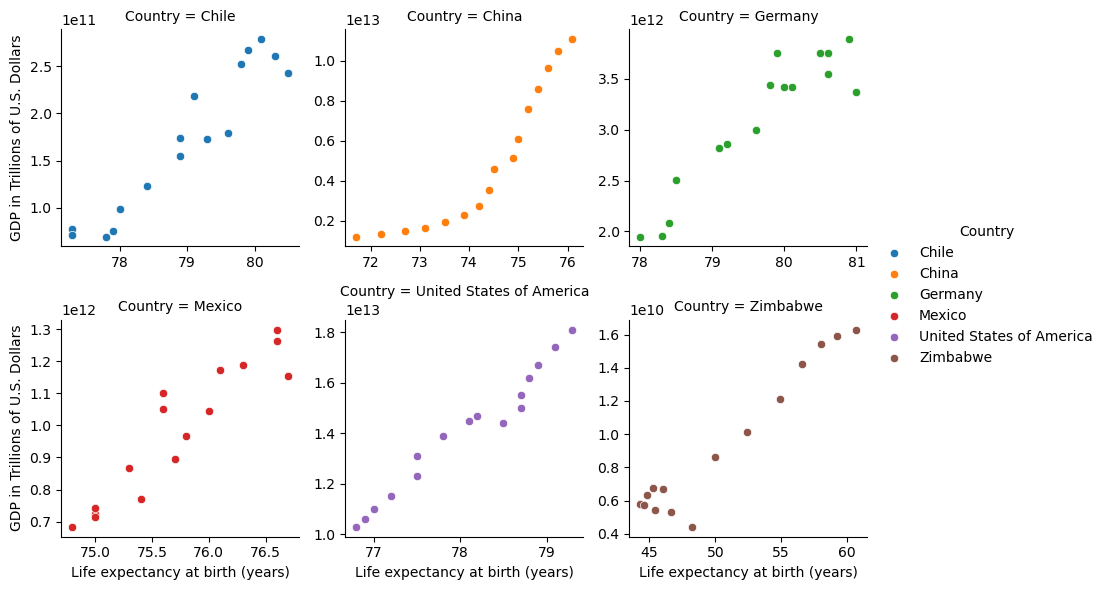

In [64]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEAB", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


Looking at the countries LEAB vs. GDP relationships individually, it can be seen that Germany, Mexico, USA and Zimbabwe have linear relationships. The plot for China looks like an exponential curve, showing a signifcant increase after around 74 years and Chile resembles a logarithmic curve.

Generally, one can see an increase in GDP as the life expectancy increases, and a positive correlation.

## Conclusion 

This project was able to show that:

- Average life expectancy was between mid to high 70s for all countries except for Zimbabwe which was 50 which also meant that he life expectancy had a left skew.
- GDP also increased for all countries, especially for China which also managed to withstand a global decrease between 2005 and 2010.
- Across the six nations, life expectancy increased between 2000 and 2015, with Zimbabwe having the greatest increase.
- There is a positive correlation between GDP and life expectancy for all countries in this dataset.
